In [1]:
!pip install shap

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import shap
import graphviz
import numpy as np
import scipy
import sklearn

In [3]:
dataset = pd.read_csv(r"/content/drive/MyDrive/CSC791:NLP/project/dataset.csv")
# Separate the X(jokes) and the Y(is_humor or not)

jokes = list(dataset['text'])
labels = list(dataset['humor'])

In [4]:
semantic_features = pd.read_csv('/content/drive/MyDrive/CSC791:NLP/project/semantic_features_scs.csv')
syntactic_features = pd.read_csv('/content/drive/MyDrive/CSC791:NLP/project/syntactic-features.csv')
nrclex_features = pd.read_csv('/content/drive/MyDrive/CSC791:NLP/project/nrclex-features.csv')
print(semantic_features.shape)
print(syntactic_features.shape)
print(nrclex_features.shape)

(200000, 10)
(200000, 15)
(200000, 11)


In [5]:
nrclex_features = nrclex_features.drop(nrclex_features.columns[0], axis=1)
syntactic_features = syntactic_features.drop(syntactic_features.columns[0], axis=1)
semantic_features = semantic_features.drop(semantic_features.columns[0], axis=1)
print(semantic_features.shape)
print(syntactic_features.shape)
print(nrclex_features.shape)

(200000, 9)
(200000, 14)
(200000, 10)


### Semantic Features DT

In [6]:
nan_count = semantic_features.isnull().sum()
print(nan_count)

disconnection               0
repetition                  0
sense_combination_score     0
farmost_path               26
closest_path               26
alliteration                0
max_alliteration            0
rhyme                       0
max_rhyme                   0
dtype: int64


In [7]:
semantic_features = semantic_features.fillna(0)

In [8]:
nan_count = semantic_features.isnull().sum()
print(nan_count)

disconnection              0
repetition                 0
sense_combination_score    0
farmost_path               0
closest_path               0
alliteration               0
max_alliteration           0
rhyme                      0
max_rhyme                  0
dtype: int64


In [9]:
train_data_X, test_data_X, train_data_Y, test_data_Y = train_test_split(semantic_features, labels, test_size=0.3)

In [10]:
model = DecisionTreeClassifier()
model.fit(train_data_X, train_data_Y)

preds = model.predict(test_data_X)
print(classification_report(preds, test_data_Y))

              precision    recall  f1-score   support

       False       0.64      0.64      0.64     29558
        True       0.65      0.64      0.65     30442

    accuracy                           0.64     60000
   macro avg       0.64      0.64      0.64     60000
weighted avg       0.64      0.64      0.64     60000



### Syntactic Features DT

In [11]:
train_data_X, test_data_X, train_data_Y, test_data_Y = train_test_split(syntactic_features, labels, test_size=0.3)

model = DecisionTreeClassifier()
model.fit(train_data_X, train_data_Y)

preds = model.predict(test_data_X)
print(classification_report(preds, test_data_Y))

              precision    recall  f1-score   support

       False       0.78      0.70      0.74     33492
        True       0.67      0.75      0.71     26508

    accuracy                           0.72     60000
   macro avg       0.72      0.73      0.72     60000
weighted avg       0.73      0.72      0.73     60000



#### NRCLex Features DT

In [12]:
train_data_X, test_data_X, train_data_Y, test_data_Y = train_test_split(nrclex_features, labels, test_size=0.3)

model = DecisionTreeClassifier()
model.fit(train_data_X, train_data_Y)

preds = model.predict(test_data_X)
print(classification_report(preds, test_data_Y))

              precision    recall  f1-score   support

       False       0.59      0.69      0.63     25646
        True       0.73      0.64      0.68     34354

    accuracy                           0.66     60000
   macro avg       0.66      0.66      0.66     60000
weighted avg       0.67      0.66      0.66     60000



### Combined Features with SHAP

In [13]:
combined_features = pd.concat([nrclex_features, syntactic_features, semantic_features], axis=1)
combined_features

,fear,anger,anticipation,trust,surprise,positive,negative,sadness,disgust,joy,...,rpnv,disconnection,repetition,sense_combination_score,farmost_path,closest_path,alliteration,max_alliteration,rhyme,max_rhyme
0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.941129,-0.256623,59040.0,0.500000,0.050000,0,1,0,1
1,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,...,0.666667,0.826847,-0.003797,31680.0,0.500000,0.045455,0,1,0,1
2,0.020000,0.020000,0.0,0.000000,0.02,0.000000,0.020000,0.020000,0.000000,0.0,...,0.500000,0.818388,-0.071782,123760.0,0.333333,0.043478,0,1,1,2
3,0.000000,0.000000,0.0,0.125000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.965455,0.019324,480.0,0.333333,0.062500,0,1,0,1
4,0.078333,0.020000,0.0,0.033333,0.02,0.033333,0.045000,0.045000,0.025000,0.0,...,0.666667,0.913695,-0.570869,880.0,0.500000,0.047619,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.000000,0.050000,0.0,0.000000,0.00,0.000000,0.050000,0.000000,0.000000,0.0,...,0.500000,0.957222,-0.028747,378.0,0.500000,0.050000,0,1,0,1
199996,0.016667,0.016667,0.0,0.000000,0.00,0.083333,0.058333,0.016667,0.058333,0.0,...,0.666667,0.868705,-0.034454,8820.0,0.500000,0.050000,0,1,1,2
199997,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.947203,-0.125161,2730.0,0.500000,0.041667,1,2,1,2
199998,0.000000,0.050000,0.0,0.000000,0.00,0.100000,0.050000,0.000000,0.000000,0.0,...,0.000000,0.826061,-0.173908,40.0,0.333333,0.058824,0,1,0,1


In [13]:
train_data_X, test_data_X, train_data_Y, test_data_Y = train_test_split(combined_features, labels, test_size=0.3)

In [15]:
model = sklearn.ensemble.GradientBoostingClassifier(n_estimators=2)
model.fit(train_data_X, train_data_Y)

preds = model.predict(test_data_X)
print(classification_report(preds, test_data_Y))

              precision    recall  f1-score   support

       False       0.43      0.66      0.52     19532
        True       0.78      0.57      0.66     40468

    accuracy                           0.60     60000
   macro avg       0.60      0.62      0.59     60000
weighted avg       0.66      0.60      0.62     60000



In [16]:
# SHAP Explainer
explainer = shap.Explainer(model.predict, test_data_X)
shap_values = explainer(test_data_X)

ExactExplainer explainer: 60001it [18:39, 53.42it/s]                           


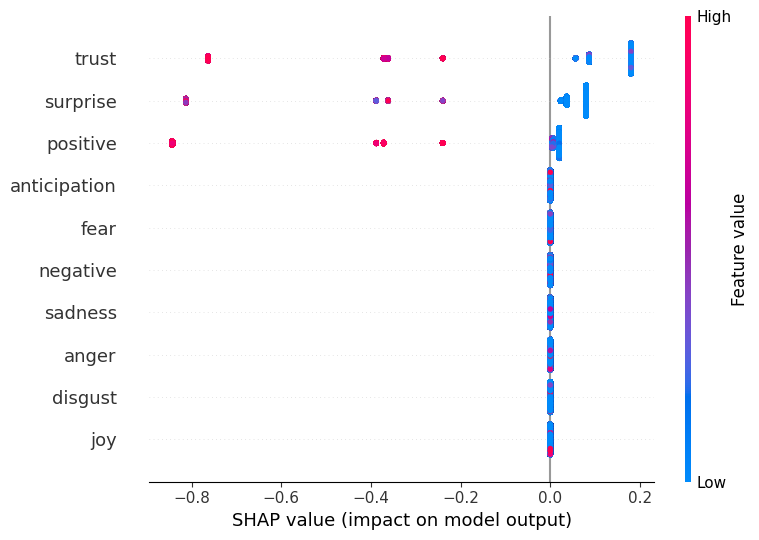

In [20]:
shap.summary_plot(shap_values, max_display=15, show=False)

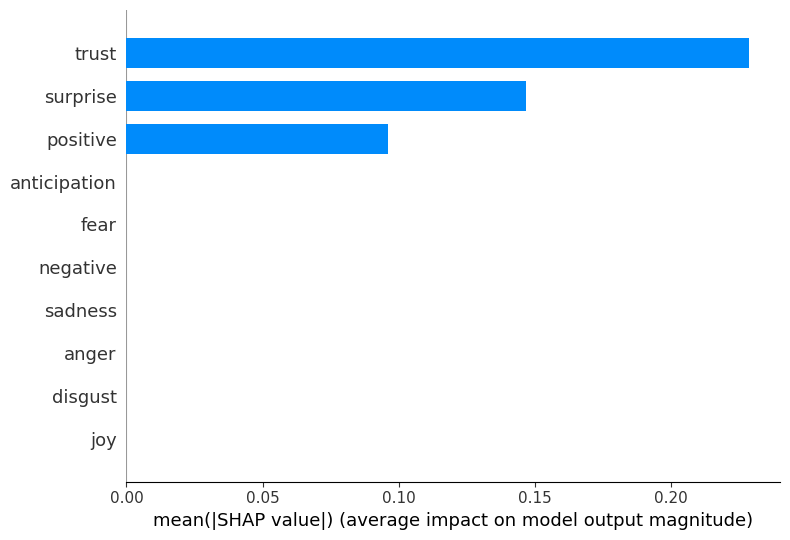

In [19]:
shap.summary_plot(shap_values, max_display=40, show=False, plot_type='bar')